## Analisis resultado de union ramas Meteo y Contaminacion para los datos de Madrid ciudad 2018 y 2019 (jaume)


In [1]:
#imports librerias
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#cargamos dataframe meteo madrid y ponemos campo fecha como indice
df_estacion_datos_diarios = pd.read_csv('../AreaMeteo/df_sinhoras_estacion_datos_diarios_mad.csv')
df_estacion_datos_diarios=df_estacion_datos_diarios.set_index('fecha')

In [3]:
print(df_estacion_datos_diarios.columns)
df_estacion_datos_diarios.head

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            indicativo                        nombre provincia  altitud  tmed  \
fecha                                                                          
2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   6.2   
2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   9.4   
2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  10.9   
2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  11.3   
2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   8.2   
...               ...                           ...       ...      ...   ...   
2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.6   
2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.2   
2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   6.9   
2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   5.7   
2019-12-31

In [4]:
#queremos 1 medina para la ciudad de madrid. hacemos drop las columnas que identifican el nombre de la estacion o relativas a la fecha. Nos quedamos solo con los valores
df_Meteo_Mad=df_estacion_datos_diarios.drop(columns=['altitud','provincia','indicativo','nombre', 'month', 'week' ,'year' ,'season','season_name'])

# agruparemos cada valor de las 3 estaciones a 1 valor mediana por fecha, asi calculamos valores por fecha para la ciudad de madrid
df_Meteo_Mad_tmed= df_Meteo_Mad.groupby('fecha')['tmed'].median()
df_Meteo_Mad_prec= df_Meteo_Mad.groupby('fecha')['prec'].median()
df_Meteo_Mad_tmin= df_Meteo_Mad.groupby('fecha')['tmin'].median()
df_Meteo_Mad_dir= df_Meteo_Mad.groupby('fecha')['dir'].median()
df_Meteo_Mad_velmedia = df_Meteo_Mad.groupby('fecha')['velmedia'].median()
df_Meteo_Mad_racha= df_Meteo_Mad.groupby('fecha')['racha'].median()
df_Meteo_Mad_sol= df_Meteo_Mad.groupby('fecha')['sol'].median()
df_Meteo_Mad_presmax= df_Meteo_Mad.groupby('fecha')['presmax'].median()
df_Meteo_Mad_presmin= df_Meteo_Mad.groupby('fecha')['presmin'].median()

df_Meteo_Mad = pd.merge(df_Meteo_Mad_tmed, df_Meteo_Mad_prec,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_tmin,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_dir,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_velmedia,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_racha,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_sol,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_presmax,left_index=True, right_index=True)
df_Meteo_Mad = pd.merge(df_Meteo_Mad, df_Meteo_Mad_presmin,left_index=True, right_index=True)

df_Meteo_Mad.head

<bound method NDFrame.head of             tmed  prec  tmin   dir  velmedia  racha  sol  presmax  presmin
fecha                                                                     
2018-01-01   6.9   0.0   1.7  26.0      3.10  10.00  5.9   953.25   950.00
2018-01-02  10.4   0.0   6.3  29.0      2.80  11.90  7.0   953.25   950.90
2018-01-03  10.9   0.0   7.2  23.0      1.70   8.60  4.6   954.15   951.05
2018-01-04  11.3   0.0   7.9  25.0      2.20   7.80  5.8   951.55   942.35
2018-01-05   8.2  13.6   5.2  22.0      3.10  11.70  1.6   942.35   925.00
...          ...   ...   ...   ...       ...    ...  ...      ...      ...
2019-12-27   8.9   0.0   2.5   5.0      0.80   6.10  8.4   951.45   949.00
2019-12-28   8.2   0.0   2.0  21.0      0.60   4.15  9.0   950.75   948.80
2019-12-29   7.8   0.0   2.0  67.0      0.80   3.75  9.0   952.25   949.50
2019-12-30   7.0   0.0   1.5  14.0      0.70   4.20  8.9   952.95   950.20
2019-12-31   6.8   0.0   1.5  21.0      0.55   3.10  8.7   953.10   95

In [5]:
#cargamos datos de contaminacion de madrid  
dfContaminacion2018_2019= pd.read_csv('../datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019.csv' , sep=';', delimiter=None, header='infer', names=None, index_col=None,)
dfContaminacion2018_2019=dfContaminacion2018_2019.set_index('date')
dfContaminacion2018_2019=dfContaminacion2018_2019.drop(columns=['year'])
dfContaminacion2018_2019.index.rename('fecha', inplace=True)
dfContaminacion2018_2019.head

<bound method NDFrame.head of                 date.1  pm10
fecha                       
2018-10-01  2018-10-01  25.0
2018-10-02  2018-10-02  32.0
2018-10-03  2018-10-03  35.0
2018-10-04  2018-10-04  39.0
2018-10-05  2018-10-05  39.0
...                ...   ...
2019-03-28  2019-03-28  25.0
2019-03-29  2019-03-29  29.0
2019-03-30  2019-03-30  27.0
2019-03-31  2019-03-31  14.0
2019-12-31  2019-12-31  44.0

[646 rows x 2 columns]>

In [6]:
# mergeamos ambos dataframes. meteo y contaminacion

df_mad = pd.merge(df_Meteo_Mad,dfContaminacion2018_2019,left_index=True, right_index=True)
df_mad .head

<bound method NDFrame.head of             tmed  prec  tmin   dir  velmedia  racha  sol  presmax  presmin  \
fecha                                                                        
2018-01-01   6.9   0.0   1.7  26.0      3.10  10.00  5.9   953.25   950.00   
2018-01-02  10.4   0.0   6.3  29.0      2.80  11.90  7.0   953.25   950.90   
2018-01-03  10.9   0.0   7.2  23.0      1.70   8.60  4.6   954.15   951.05   
2018-01-04  11.3   0.0   7.9  25.0      2.20   7.80  5.8   951.55   942.35   
2018-01-05   8.2  13.6   5.2  22.0      3.10  11.70  1.6   942.35   925.00   
...          ...   ...   ...   ...       ...    ...  ...      ...      ...   
2019-12-26  10.3   0.0   5.0   2.5      1.40   6.10  7.9   950.40   946.85   
2019-12-27   8.9   0.0   2.5   5.0      0.80   6.10  8.4   951.45   949.00   
2019-12-28   8.2   0.0   2.0  21.0      0.60   4.15  9.0   950.75   948.80   
2019-12-29   7.8   0.0   2.0  67.0      0.80   3.75  9.0   952.25   949.50   
2019-12-31   6.8   0.0   1.5  21.0

In [7]:
df_mad.describe()

,tmed,prec,tmin,dir,velmedia,racha,sol,presmax,presmin,pm10
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,643.000000
mean,15.629799,1.151084,10.077709,19.671827,2.183282,9.473684,8.358359,941.368731,936.743111,24.127527
std,8.101386,3.924190,7.191732,13.059549,1.184725,3.518926,3.904235,6.156612,7.112969,12.238641
min,1.500000,0.000000,-3.400000,1.000000,0.300000,3.100000,0.000000,919.200000,905.000000,5.000000
25%,8.400000,0.000000,3.900000,9.000000,1.400000,6.950000,6.125000,938.250000,933.425000,15.000000
50%,13.800000,0.000000,8.700000,23.000000,1.900000,9.200000,9.300000,941.300000,937.125000,22.000000
75%,23.075000,0.000000,16.587500,25.000000,2.800000,11.625000,11.000000,945.337500,940.775000,31.000000
max,32.900000,36.200000,25.100000,99.000000,7.250000,25.800000,13.500000,956.700000,952.500000,73.000000


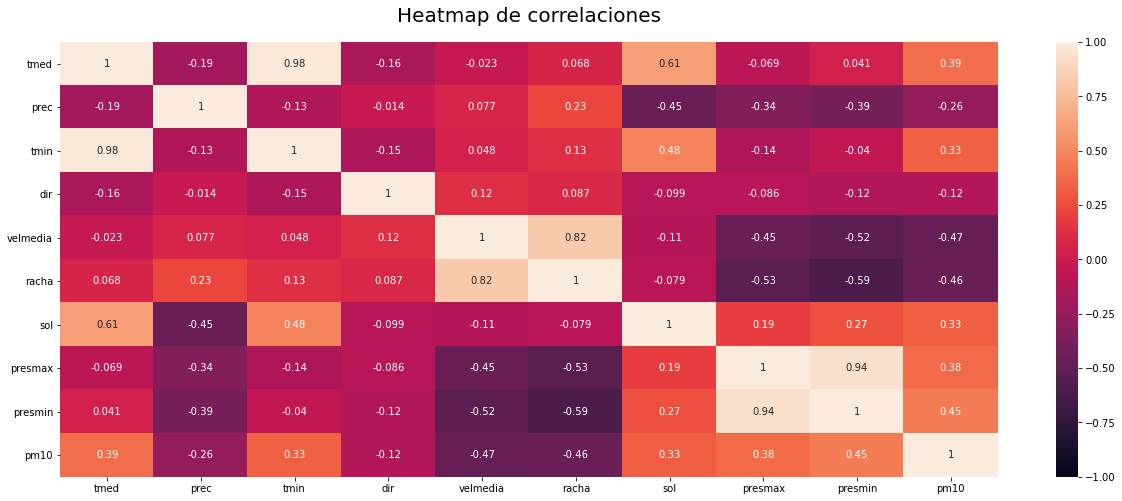

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(21, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_mad.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);

### Vemos cierta correlacion positiva de particulas pm10 con las presiones maximas y minamas asi como las temperaturas. 
### el pm10 , asi como las presiones atmosfericas tambien tiene correlacion negativa con los campos de viento (velmedia y racha)

In [9]:
#primero convertimos date.1 a tip datetime
df_mad["date.1"]=pd.to_datetime(df_mad["date.1"], format='%Y-%m-%d', errors='coerce')
#para luego crear estaciones del año y otros campos derivados del campo date.1

df_mad['season'] = (df_mad['date.1'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df_mad['season_name'] = df_mad['season'].map(seasons)

import datetime
df_mad['year'] = pd.DatetimeIndex(df_mad['date.1']).year
df_mad['month'] = pd.DatetimeIndex(df_mad['date.1']).month
df_mad['week'] = pd.DatetimeIndex(df_mad['date.1']).week

#transformo month y year a string para sacar el month-year
df_mad['month']= df_mad['month'].astype(str)
df_mad['year']= df_mad['year'].astype(str)
df_mad['month-year'] = df_mad[['month', 'year']].agg('-'.join, axis=1)

df_mad.head()

<ipython-input-9-fdc9c380d487>:19: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_mad['week'] = pd.DatetimeIndex(df_mad['date.1']).week


,tmed,prec,tmin,dir,velmedia,racha,sol,presmax,presmin,date.1,pm10,season,season_name,year,month,week,month-year
fecha,,,,,,,,,,,,,,,,,
2018-01-01,6.9,0.0,1.7,26.0,3.1,10.0,5.9,953.25,950.00,2018-01-01,11.0,1,Winter,2018,1,1,1-2018
2018-01-02,10.4,0.0,6.3,29.0,2.8,11.9,7.0,953.25,950.90,2018-01-02,12.0,1,Winter,2018,1,1,1-2018
2018-01-03,10.9,0.0,7.2,23.0,1.7,8.6,4.6,954.15,951.05,2018-01-03,10.0,1,Winter,2018,1,1,1-2018
2018-01-04,11.3,0.0,7.9,25.0,2.2,7.8,5.8,951.55,942.35,2018-01-04,8.0,1,Winter,2018,1,1,1-2018
2018-01-05,8.2,13.6,5.2,22.0,3.1,11.7,1.6,942.35,925.00,2018-01-05,5.0,1,Winter,2018,1,1,1-2018


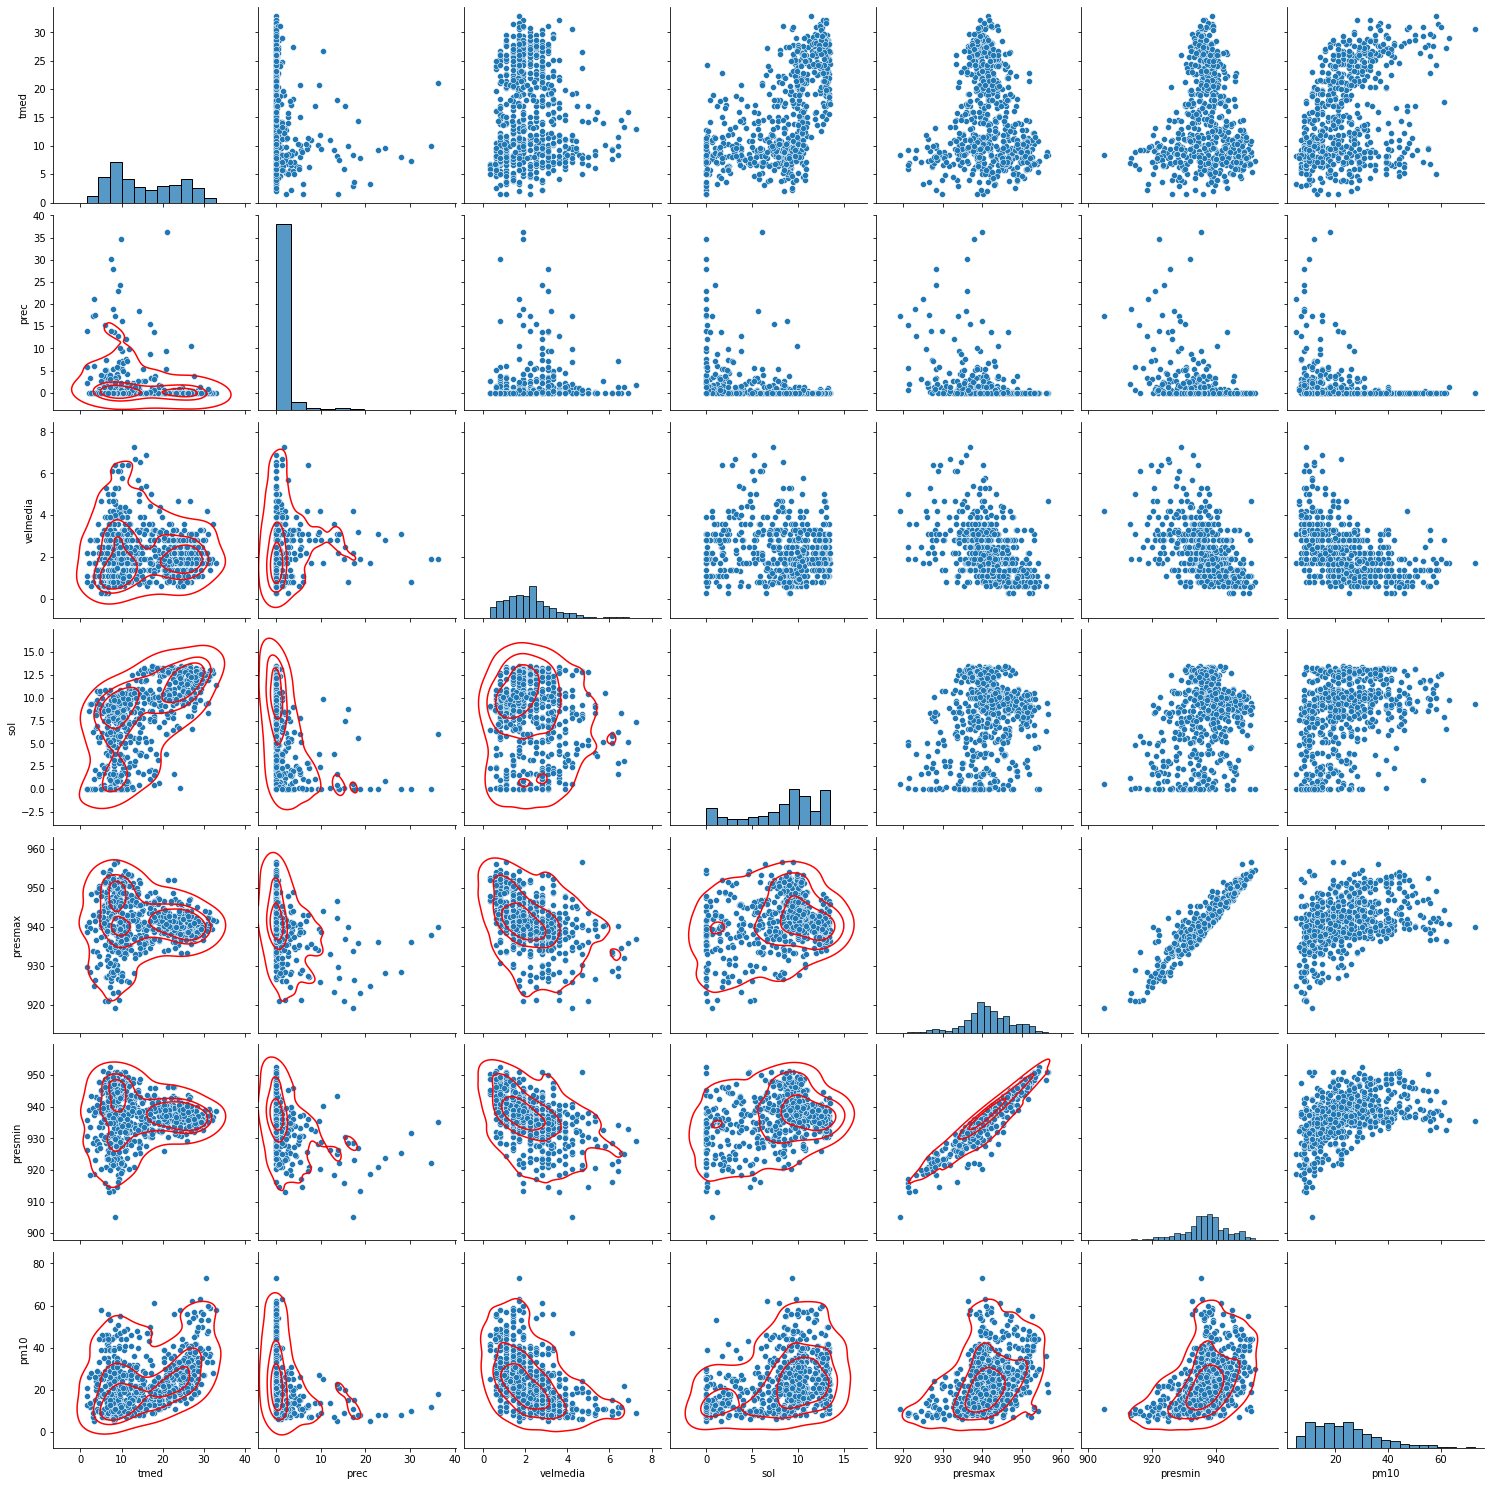

In [10]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10
from seaborn import pairplot
df_mad_subframe=df_mad[['tmed','prec','velmedia','sol','presmax','presmin','pm10','season_name']]
g = sns.pairplot(df_mad_subframe, diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

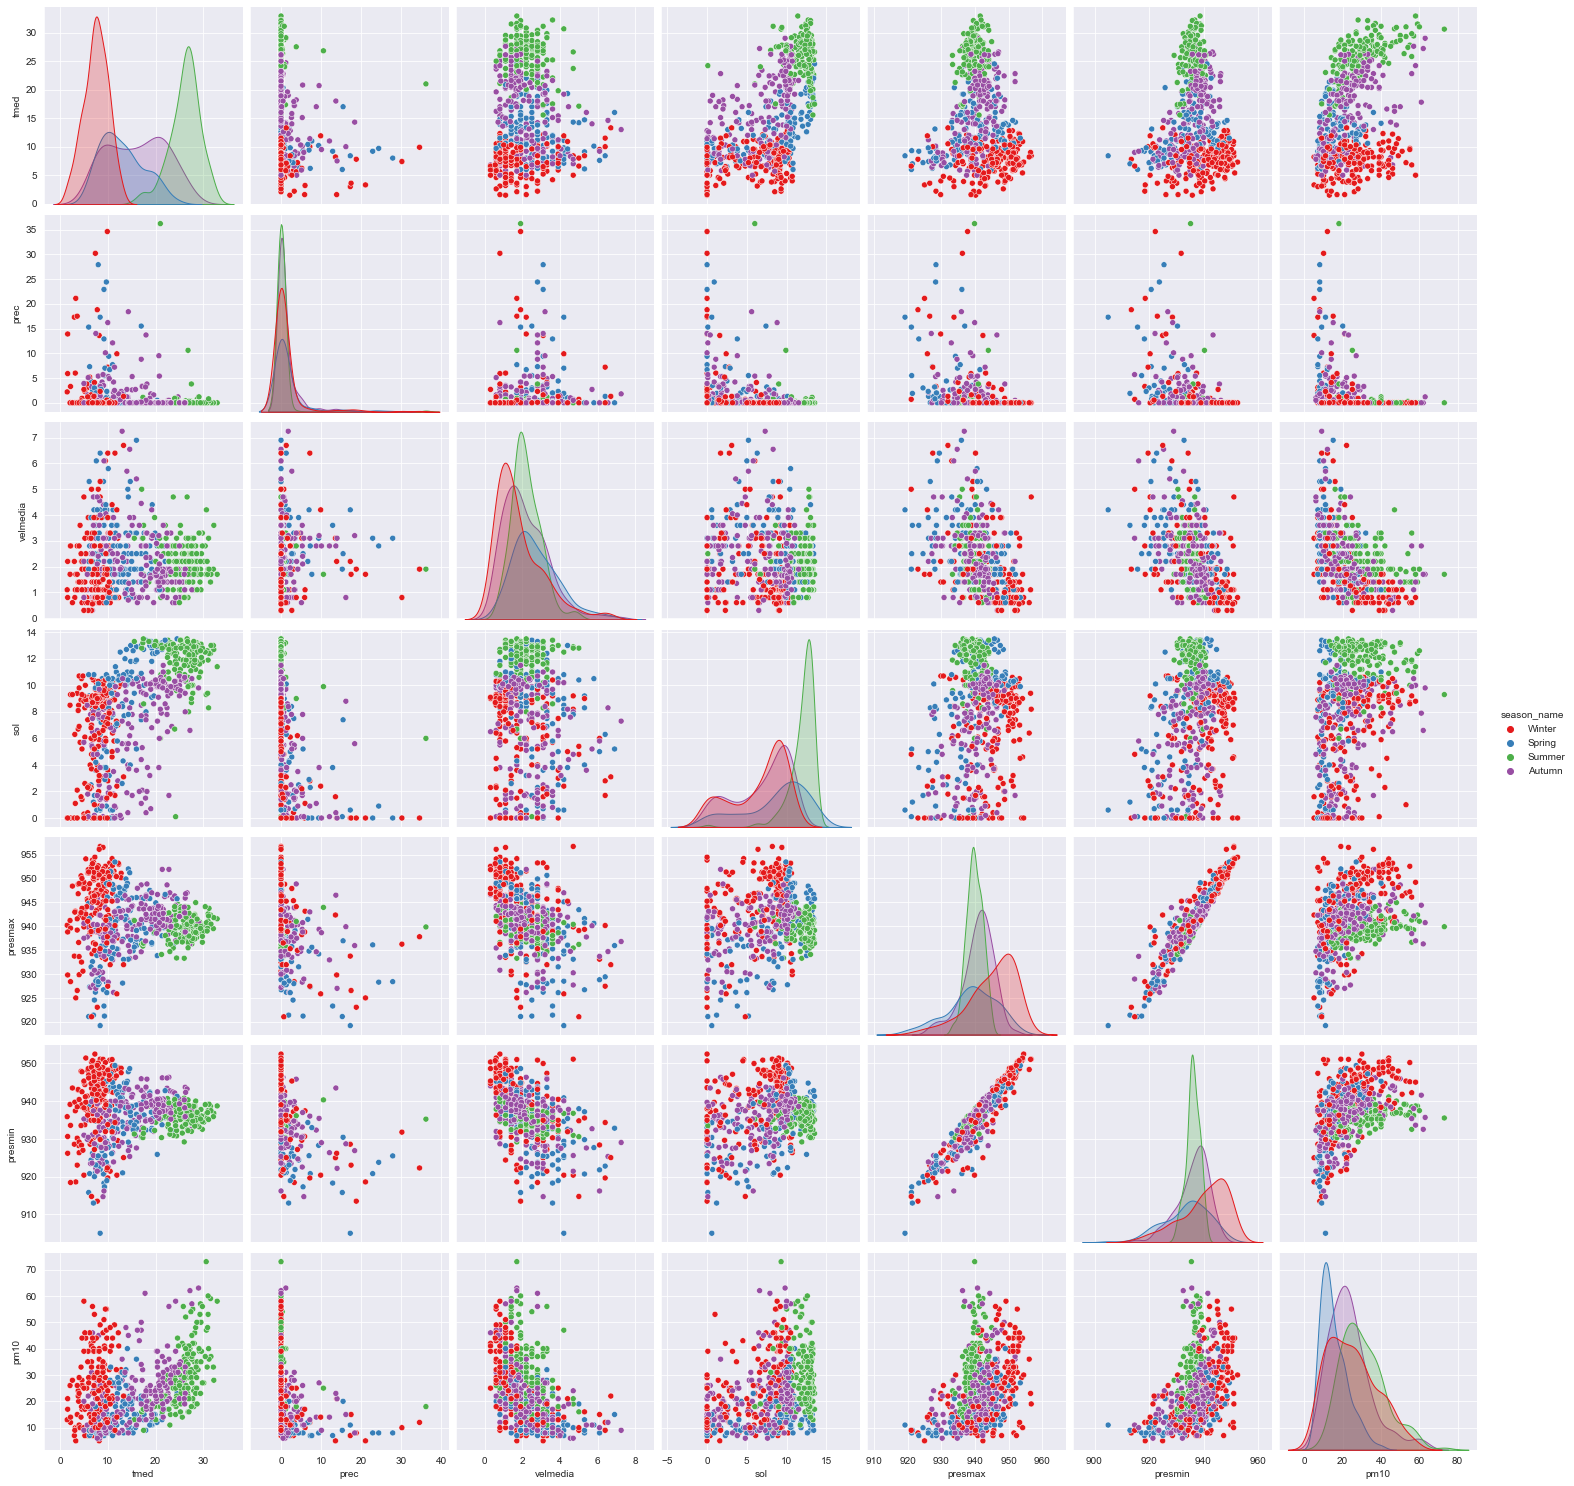

In [11]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10 vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['tmed','prec','velmedia','sol','presmax','presmin','pm10','season_name']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

<ipython-input-19-b744841c08eb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


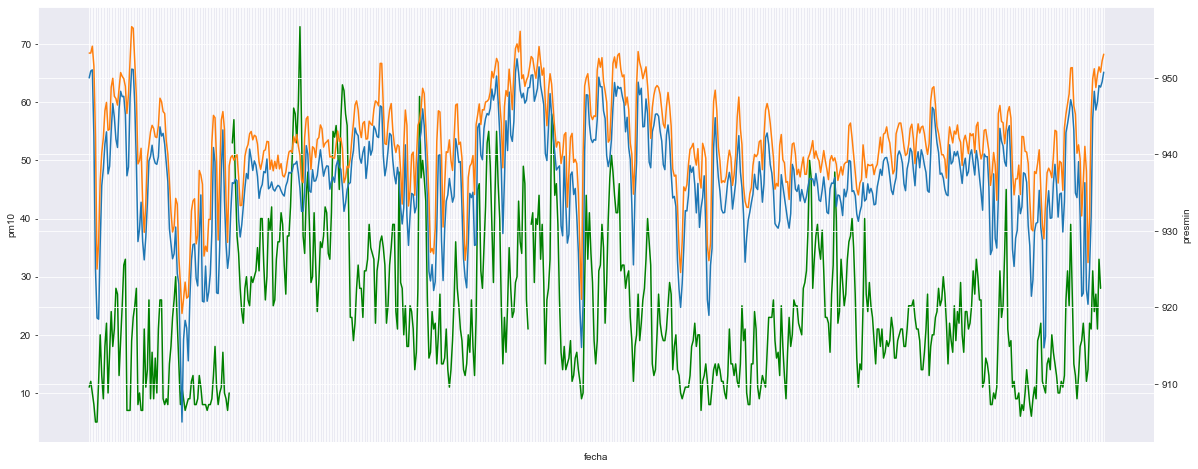

In [19]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_presiones.jpg', format='jpeg', dpi=70)

<ipython-input-24-1707408b5f8c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


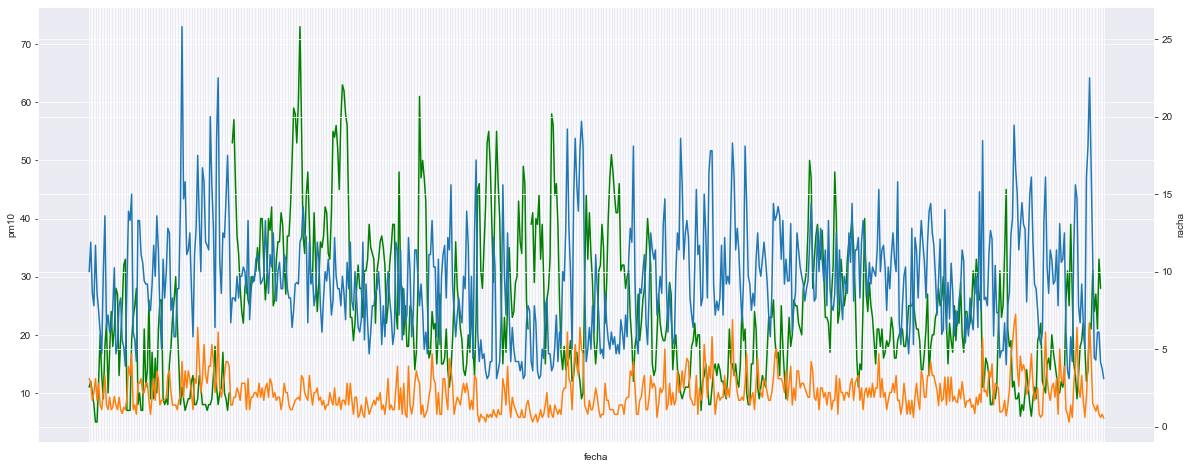

In [24]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.racha,palette='Set2', ax=ax2)
sns.lineplot(data=df_mad.velmedia,palette='Set2', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_viento.jpg', format='jpeg', dpi=70)

<ipython-input-26-dd089bee269c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


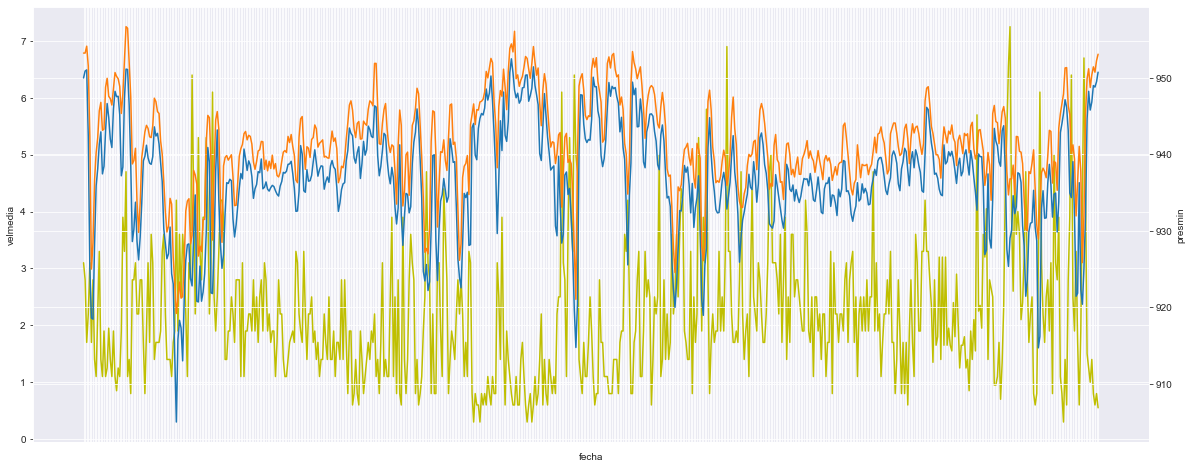

In [26]:
ax=sns.lineplot(data=df_mad.velmedia, color="y")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('presion_vs_viento.jpg', format='jpeg', dpi=70)

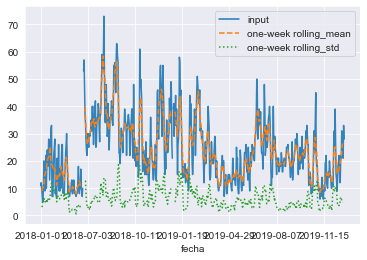

In [31]:
#ver como graficar medias moviles para presion y pm10?

rolling = df_mad['pm10'].rolling(7, center=True)

data = pd.DataFrame({'input': df_mad['pm10'],
                     'one-week rolling_mean': rolling.mean(),
                     'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.9)

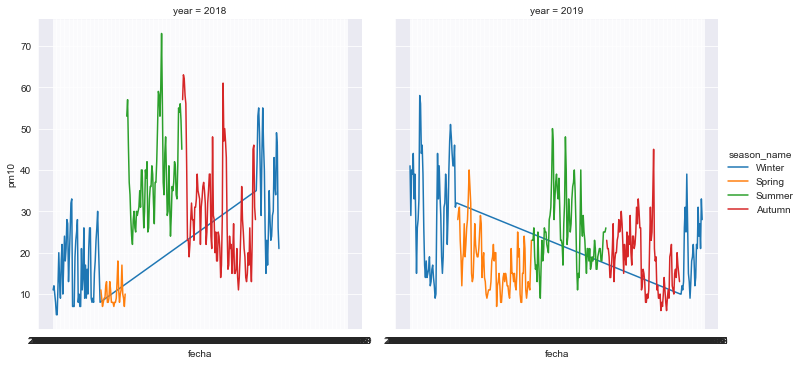

In [21]:
sns.relplot(
    data=df_mad, x="fecha", y="pm10",
    col="year", hue="season_name",
    kind="line"
)